In [3]:
# --- ライブラリ読み込み ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import re

# --- データ読み込み ---
df = pd.read_csv("McDonald_s_Reviews.csv", encoding="ISO-8859-1")

# --- 整形 ---
# 評価を数値化（例："4 stars" → 4）
df["rating_num"] = df["rating"].str.extract(r"(\d)").astype(float)

# 評価数を数値化（例："1,240" → 1240）
df["rating_count_clean"] = df["rating_count"].replace(",", "", regex=True).astype(float)

# レビュー時期（自然言語）を月単位で近似
def parse_review_time(text):
    if pd.isna(text):
        return np.nan
    text = text.lower()
    if "year" in text:
        return 12
    elif "month" in text:
        return int(re.search(r'\d+', text)[0]) if re.search(r'\d+', text) else 1
    elif "week" in text:
        return 0.25
    elif "day" in text:
        return 0.1
    else:
        return np.nan

df["review_age_months"] = df["review_time"].apply(parse_review_time)

# 欠損値のある行を除外
analysis_df = df[["rating_num", "rating_count_clean", "review_age_months"]].dropna()

単回帰分析（評価数 → 評価）

In [4]:
X1 = sm.add_constant(analysis_df["rating_count_clean"])
y = analysis_df["rating_num"]
model1 = sm.OLS(y, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             rating_num   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     87.94
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           7.15e-21
Time:                        12:24:21   Log-Likelihood:                -63338.
No. Observations:               33389   AIC:                         1.267e+05
Df Residuals:                   33387   BIC:                         1.267e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.2168      0

単回帰分析（レビューの古さ → 評価）

In [5]:
X2 = sm.add_constant(analysis_df["review_age_months"])
model2 = sm.OLS(y, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             rating_num   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     21.80
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           3.04e-06
Time:                        12:24:32   Log-Likelihood:                -63371.
No. Observations:               33389   AIC:                         1.267e+05
Df Residuals:                   33387   BIC:                         1.268e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.9788      0.03

重回帰分析（両方の変数）

In [6]:
X3 = sm.add_constant(analysis_df[["rating_count_clean", "review_age_months"]])
model3 = sm.OLS(y, X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             rating_num   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     47.10
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           3.76e-21
Time:                        12:24:48   Log-Likelihood:                -63335.
No. Observations:               33389   AIC:                         1.267e+05
Df Residuals:                   33386   BIC:                         1.267e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.1271      0

散布図 + 回帰直線（Seaborn）

Text(0.5, 1.02, 'Rating vs Rating Count')

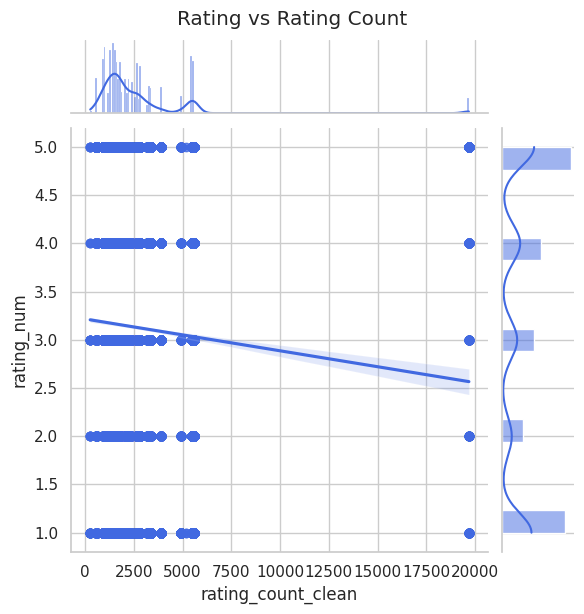

In [7]:
sns.set(style="whitegrid")
sns.jointplot(
    data=analysis_df,
    x="rating_count_clean",
    y="rating_num",
    kind="reg",
    height=6,
    color="royalblue"
).fig.suptitle("Rating vs Rating Count", y=1.02)

相関ヒートマップ

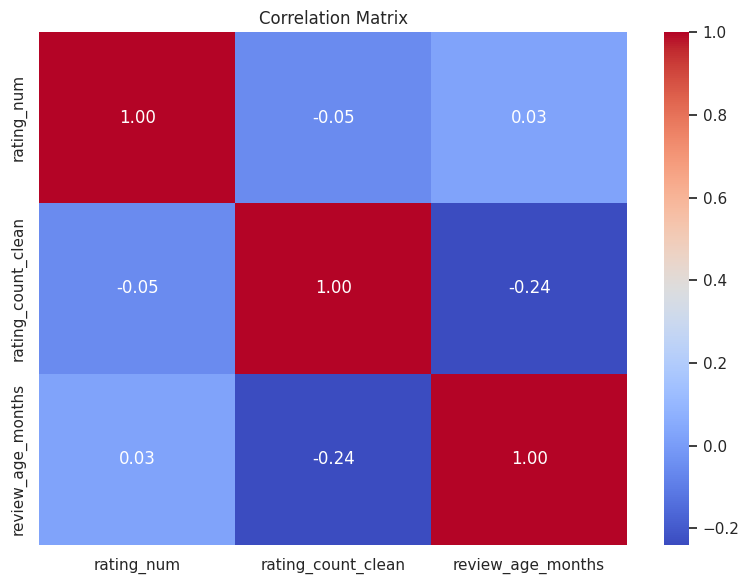

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(analysis_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

位置情報を地図にプロット

In [9]:
pip install folium

In [12]:
pip install selenium webdriver-manager pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.8/129.8 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.4.0
    Uninstalling urllib3-2.4.0:
      Successfully uninstalled urllib3-2.4.0


In [4]:
!apt-get update
!apt-get install -y libgl1-mesa-glx libglvnd0 libglx0 libdrm2 libgbm1 libxkbcommon0

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,840 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,764 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,572 kB]
Hit:13 https://ppa.launchpadcontent.

In [8]:
pip install geopandas contextily matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 78.1 MB/s eta 0:00:00


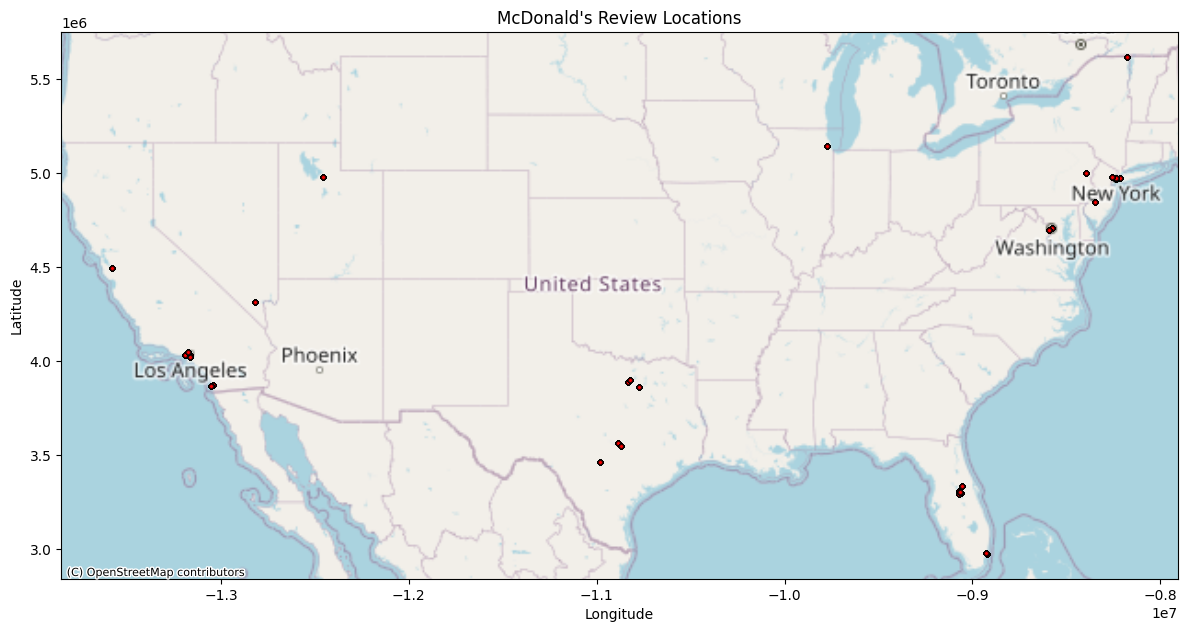

In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

# データ読み込み
df = pd.read_csv("McDonald_s_Reviews.csv", encoding="ISO-8859-1")
df.columns = df.columns.str.strip()

# 緯度・経度の欠損を除外
df = df[['latitude', 'longitude', 'rating']].dropna()

# GeoDataFrameに変換（緯度経度をポイントに）
gdf = gpd.GeoDataFrame(df,
                       geometry=gpd.points_from_xy(df['longitude'], df['latitude']),
                       crs="EPSG:4326")

# Web地図用に座標系を変換（Webメルカトル）
gdf = gdf.to_crs(epsg=3857)

# 地図を描画
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, alpha=0.5, edgecolor='k', color='red', markersize=10)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title("McDonald's Review Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.savefig("mcd_map_static.png", dpi=200)  # PNGとして保存
plt.show()